In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
automobile = pd.read_csv("Automobile price data _Raw_.csv")

In [3]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
automobile.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
data = automobile.replace('?',np.NAN) 
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
# normalized-losses    41
# num-of-doors          2
# bore                  4
# stroke                4
# price                 4
# horsepower            2
# peak-rpm              2

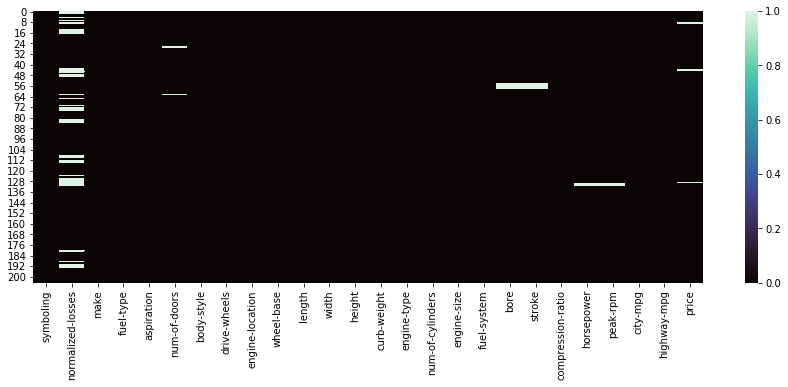

In [7]:
plt.figure(figsize = (15,5))
sns.heatmap(data.isnull(),cmap='mako', cbar=True)

In [8]:
nl = automobile['normalized-losses'].loc[automobile['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
automobile['normalized-losses'] = automobile['normalized-losses'].replace('?',nlmean).astype(int)
automobile['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [9]:
price = automobile['price'].loc[automobile['price'] != '?']
pmean = price.astype(str).astype(int).mean()
automobile['price'] = automobile['price'].replace('?',pmean).astype(int)
automobile['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [10]:
temp = automobile[automobile['horsepower']!='?']
normalised_mean = temp['horsepower'].astype(int).mean()
automobile['horsepower'] = automobile['horsepower'].replace('?',normalised_mean).astype(int)

In [11]:
df_temp = automobile[automobile['bore']!='?']
normalised_mean = df_temp['bore'].astype(float).mean()
automobile['bore'] = automobile['bore'].replace('?',normalised_mean).astype(float)
automobile['bore'] = pd.to_numeric(automobile['bore'])

In [12]:
df_temp = automobile[automobile['peak-rpm']!='?']
normalised_mean = df_temp['peak-rpm'].astype(int).mean()
automobile['peak-rpm'] = automobile['peak-rpm'].replace('?',normalised_mean).astype(int)

In [13]:
df_temp = automobile[automobile['stroke']!='?']
normalised_mean = df_temp['stroke'].astype(float).mean()
automobile['stroke'] = automobile['stroke'].replace('?',normalised_mean).astype(float)

In [14]:
automobile['num-of-doors'] = automobile['num-of-doors'].replace('?','four')

In [15]:
automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:
automobile['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [17]:
from word2number import w2n

In [18]:
nums = []
for i in automobile['num-of-cylinders']:
    x = w2n.word_to_num(i)
    nums.append(x)
automobile['num-of-cylinders'] = nums

In [19]:
nums = []
for i in automobile['num-of-doors']:
    x = w2n.word_to_num(i)
    nums.append(x)
automobile['num-of-doors'] = nums

In [20]:
automobile['engine-location'] = pd.get_dummies(automobile['engine-location'],drop_first=True)

In [21]:
automobile['aspiration'] = pd.get_dummies(automobile['aspiration'],drop_first=True)

In [22]:
automobile['fuel-type'] = pd.get_dummies(automobile['fuel-type'],drop_first=True)

In [23]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [24]:
automobile['body-style']= label_encoder.fit_transform(automobile['body-style']) 

In [25]:
automobile['engine-type']= label_encoder.fit_transform(automobile['engine-type']) 

In [26]:
automobile['drive-wheels']= label_encoder.fit_transform(automobile['drive-wheels']) 

In [27]:
automobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type              uint8
aspiration             uint8
num-of-doors           int64
body-style             int32
drive-wheels           int32
engine-location        uint8
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int32
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

# Exploratory data analysis

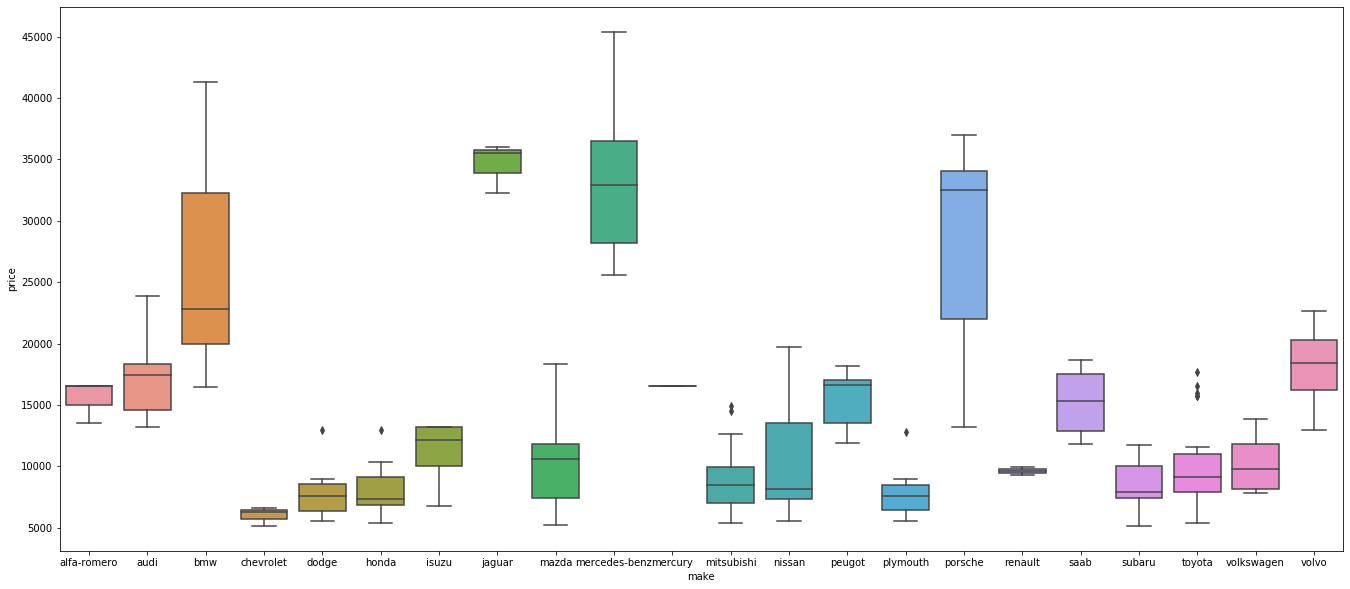

In [28]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=automobile)

# CONCLUSION

<b>Mercedes benz, manufacture the most expensive car and the least expensive is manufactured Chevrolet.

The premium cars costing more than 20000 are BMW, Jaquar, Mercedes benz and Porsche.</b>

<b>Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru.

Most of the cars are in the midrange between 10000 and 20000 which has the highest number of cars.</b>

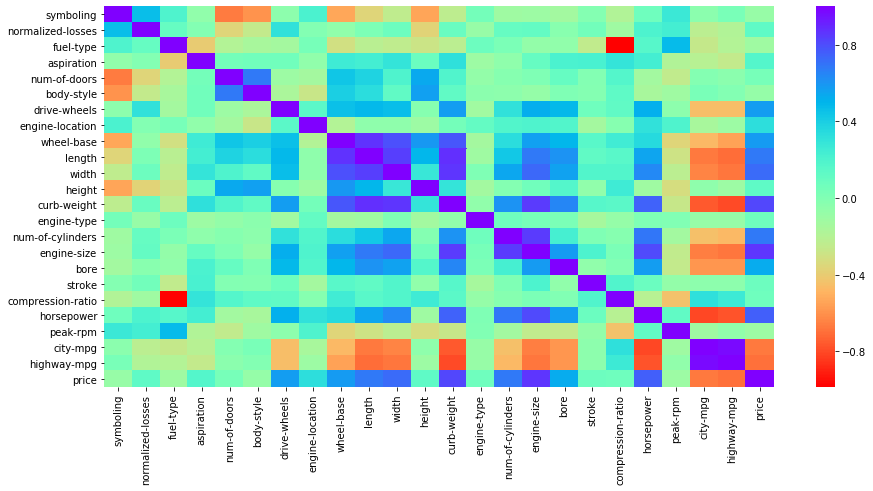

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(automobile.corr(), cbar=True,cmap='rainbow_r')

<b>CONCLUSION: The above heatmap shows that all the given columns have a linear relation</b>

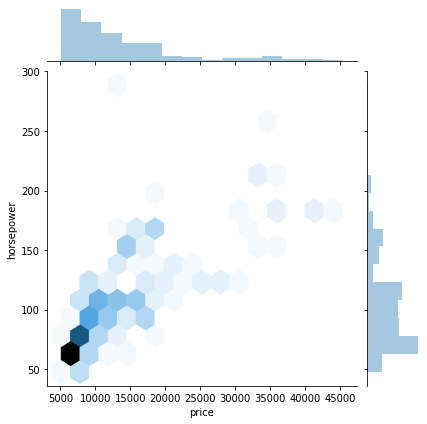

In [30]:
sns.jointplot(x='price',y='horsepower',data=automobile, kind='hex')

<b>CONCLUSION: The above plot shows distribution compression ratio of horsepower and price is concentrated at the price range of 5k-15k and had an approximate value of horsepower lies in the range 50-100hp</b>

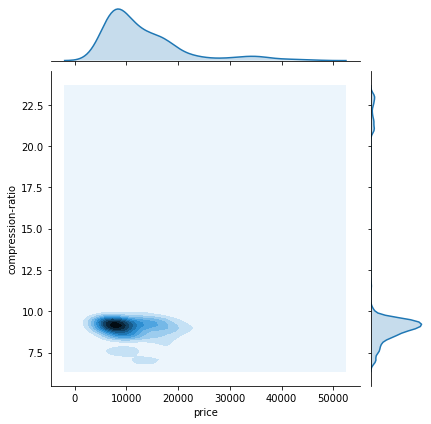

In [31]:
sns.jointplot(x='price',y='compression-ratio',data=automobile, kind='kde')

<b>CONCLUSION: The above plot shows kernel density distribution lies more at range 8-10 and had price range of 5k-10k approx</b>

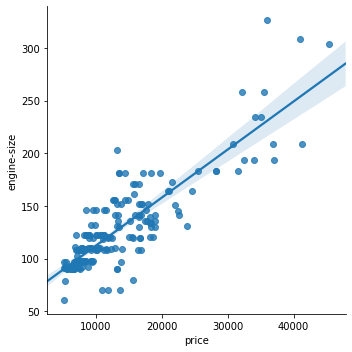

In [32]:
sns.lmplot('price',"engine-size", automobile);

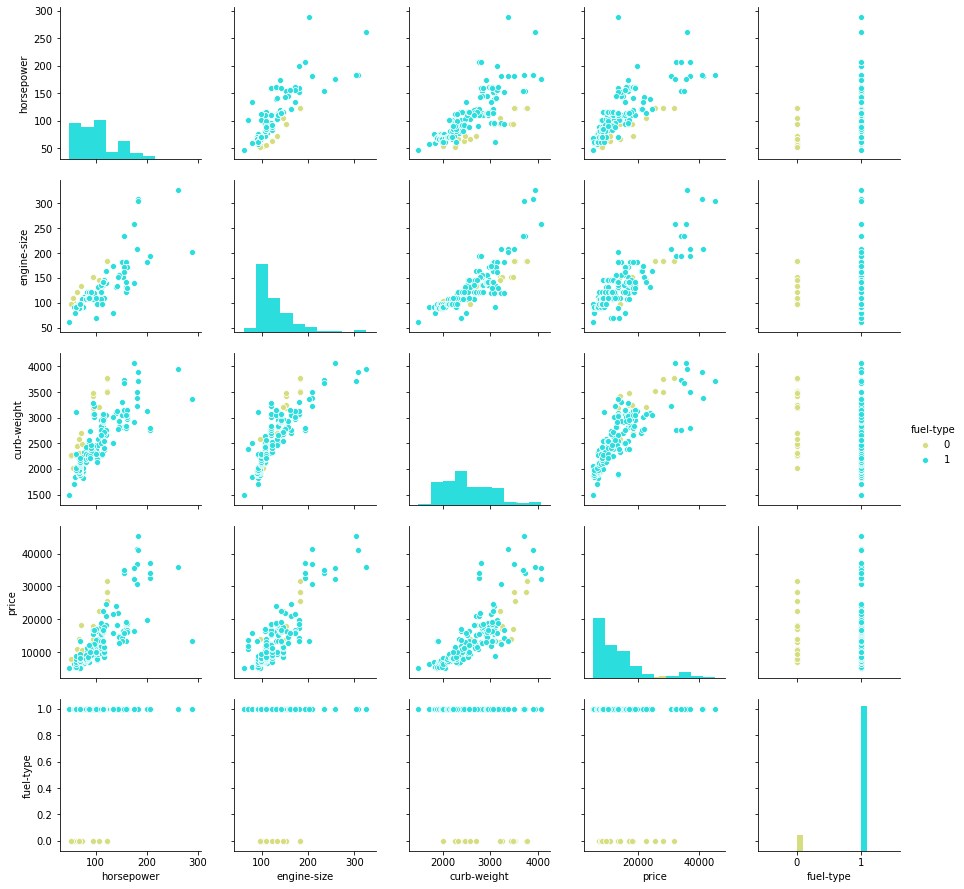

In [33]:
sns.pairplot(automobile[["horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist",palette="rainbow_r")

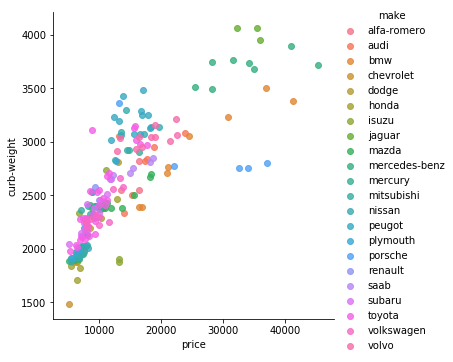

In [34]:
sns.lmplot('price',"curb-weight", automobile, hue="make", fit_reg=False)

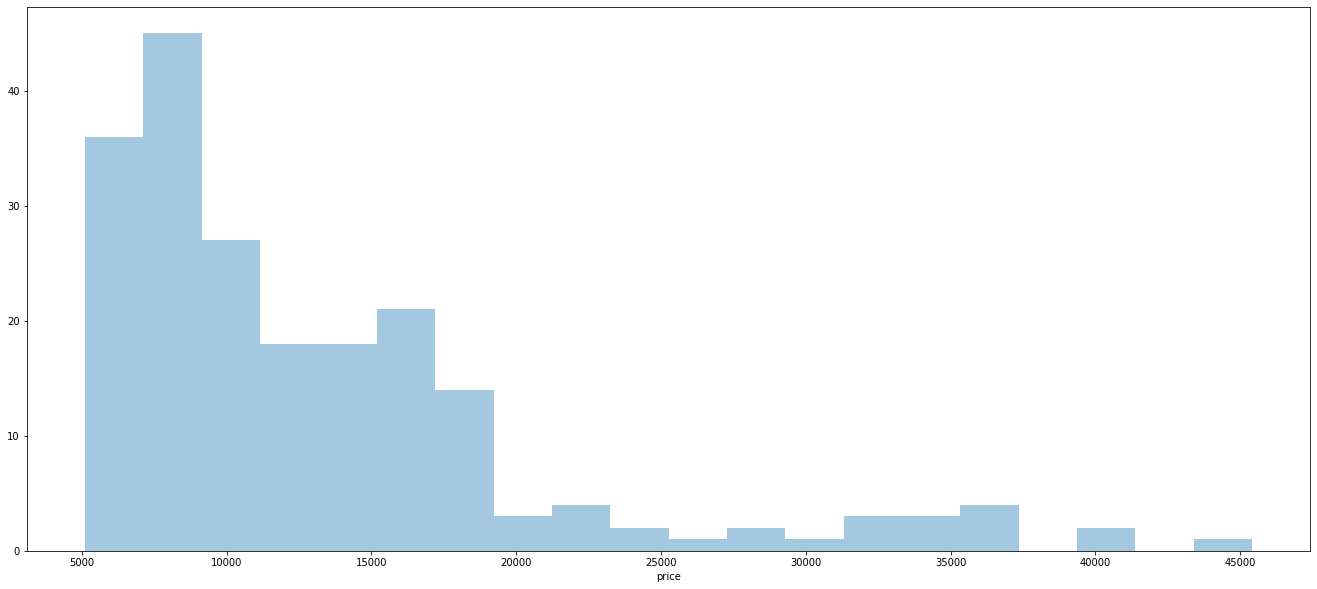

In [60]:
sns.distplot(automobile['price'],kde=False,bins=20)

# CONCLUSION:
<b>The above plot shows the distribution of different vehicle price value present in the dataset and infer that most of the vehicle's price are between 5000 and 20000 approx.</b>

# Selecting feature and target columns

In [35]:
y = automobile['price']
X = automobile.drop(['fuel-system','make','price'],axis=1)

# Splitting dataset as training and testing set

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.9)

# Linear regression model

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
predictions = lm.predict( X_test)

In [40]:
pd.DataFrame({'Expected':y_test, 'predicted':predictions}).head()

,Expected,predicted
83,14869,15310.591216
143,9960,9472.254941
71,34184,33312.057609
110,13860,21224.652504
7,18920,17563.344743


In [41]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [42]:
r2_score(y_test, predictions)

0.7934878104670514

<b>Training multiple models to get model with best r2 score</b>

In [43]:
best_r2 = 0 
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    if best_r2 < r2_score(y_test, y_pred):
        best_r2 = r2_score(y_test, y_pred)
print(best_r2)

0.9299655637213065


# CONCLUSION:

<b>Linear regression model performs at an accuracy of 92.9965% for given dataset</b>

# Decision tree and Random forest 

In [44]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [45]:
predictions = clf.predict( X_test)

In [46]:
r2_score(y_test, predictions)

0.8178945418594694

# CONCLUSION:
<b>Decision tree model performs at an accuracy of 81.7894% for given dataset, this can furthur be improvised using ensemble of trees(random forest)</b>

# Random forest

In [47]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

C:\Users\deepi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [48]:
yhat = model.predict(X_test)

In [49]:
r2_score(y_test, yhat)

0.8462785255993037

<b>Training multiple models to get model with best r2 score</b>

In [50]:
best_rfc_r2 = 0 
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if best_rfc_r2 < r2_score(y_test, y_pred):
        best_rfc_r2 = r2_score(y_test, y_pred)
print(best_rfc_r2)

0.9283285826240253


# CONCLUSION:
<b>Random forest model performs at an accuracy of 92.8328% for given dataset</b>

# SVM/SVR model

In [51]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [52]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear']}

In [53]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [54]:
grid.fit(X_train,y_train)

C:\Users\deepi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.674, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.661, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.592, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.661, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.592, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1,

[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.676, total=   9.3s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.581, total=  15.4s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .. C=100, gamma=0.0001, kernel=linear, score=0.592, total=   6.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ..... C=1000, gamma=1, kernel=linear, score=-0.636, total=  10.9s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.277, total=  12.6s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ..... C=1000, gamma=1, kernel=linear, score=-0.152, total=  26.2s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ... C=1000, gamma=0.1, kernel=linear, score=-0.636, total=  10.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  6.7min finished
C:\Users\deepi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [55]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [56]:
grid.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [57]:
grid_predictions = grid.predict(X_test)

In [58]:
r2_score(y_test, grid_predictions)

0.814238804277486

# CONCLUSION:
<b>SVR model performs at an accuracy of 81.4238% for given dataset</b>

# FINAL CONCLUSION:
<b>Linear regression model has the highest performance compared to Random forest and SVR model to give best accuracy for given dataset with an r2 score of 0.9299 i.e., 92.99%